# Chapter 3: Classification


## MNIST:
In this example, we're dealing with MNIST Database of characters.

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [5]:
X,y = digits['data'], digits["target"]
print("X has " + str(X.shape[0]) + " images with " + str(X.shape[1]) + " pixels." )

X has 1797 images with 64 pixels.


X is an array of digit images, y is an array of X values.

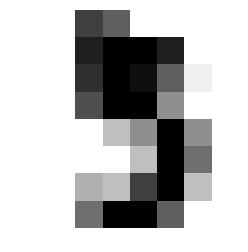

Label for some_digit is 5


In [6]:
def check_digit(X, y, i):
    some_digit = X[i]
    some_digit_image = some_digit.reshape(8, 8)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    print("Label for some_digit is " + str(y[i]))
    return;

check_digit(X, y, 5)

Now we split our data in training and test sets:

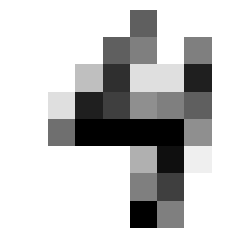

Label for some_digit is 4


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
check_digit(x_train, y_train, 5)


Let's make a classifier for the digit 5:

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42, max_iter=1000)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([X[5]])

array([False])

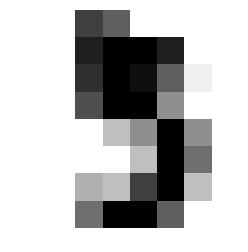

Label for some_digit is 5


In [10]:
check_digit(X, y, 5)

In [11]:
sgd_clf.predict([X[15]])

array([ True])

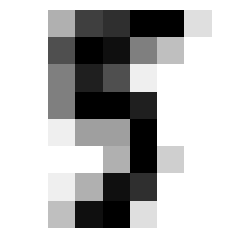

Label for some_digit is 5


In [12]:
check_digit(X, y, 15)

### MEASURING CROSS VALIDATION:

Using StratifiedKfold(...), we split our train and test sets in three subsets each.
<br>Iterating over these three subsets, we can evaluate our model by printing the rate of correct predictions.

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print( n_correct/ len(y_pred))

0.9895833333333334
0.9874739039665971
0.99581589958159


Alternative way:

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.98958333, 0.9874739 , 0.9958159 ])

In [15]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [16]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.86847599, 0.91022965, 0.92484342])

## Confusion Matrix:

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[1291,    4],
       [   9,  133]])

#### Each row represents an actual class, while each column represents a predicted class.

|True Negative ___________ False Positive|
<br>|False Negative ____________         True Positive |

By definition:
<br>precision = TP/(TP + FP)
<br>recall = TP/(TP + FN)
<br> F1_score = harmonic_mean(precision, recall)


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision score is {}, recall score is {}".format(precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)))
print("F1 Score is {}".format(f1_score(y_train_5, y_train_pred)))

precision score is 0.9708029197080292, recall score is 0.9366197183098591
F1 Score is 0.9534050179211471


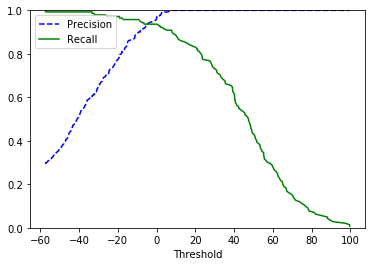

In [43]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
